## Plotting stations in Sydney
Falling in love with the place called Sydney, I have the question: Am I ever going to be able to have a place to call my own home?\
Seeing the surging house prices and interest rates, I want to figure out if I am able to buy my dream home in Sydney, what are some realistic options and what can I do to optimise my chances.


### Configuration


In [120]:
import os
import geopandas as gp
import shapely
from shapely.geometry import Point
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [121]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 20)
saved_style_state = matplotlib.rcParams.copy()

### Getting Map of Sydney


### Public Transport
Something really important to be is being able to get around via public transport, as I get really anxious driving in busy traffic.

In [122]:
# load in the files
filepath = "sydney_stations.csv"
stations = pd.read_csv(filepath)
print("file loaded")
stations.columns

file loaded


Index(['Station', 'Latitude', 'Longitude'], dtype='object')

In [123]:
geometry = [Point(xy) for xy in zip(stations['Longitude'], stations['Latitude'])]
gdf = gp.GeoDataFrame(stations, geometry=geometry)

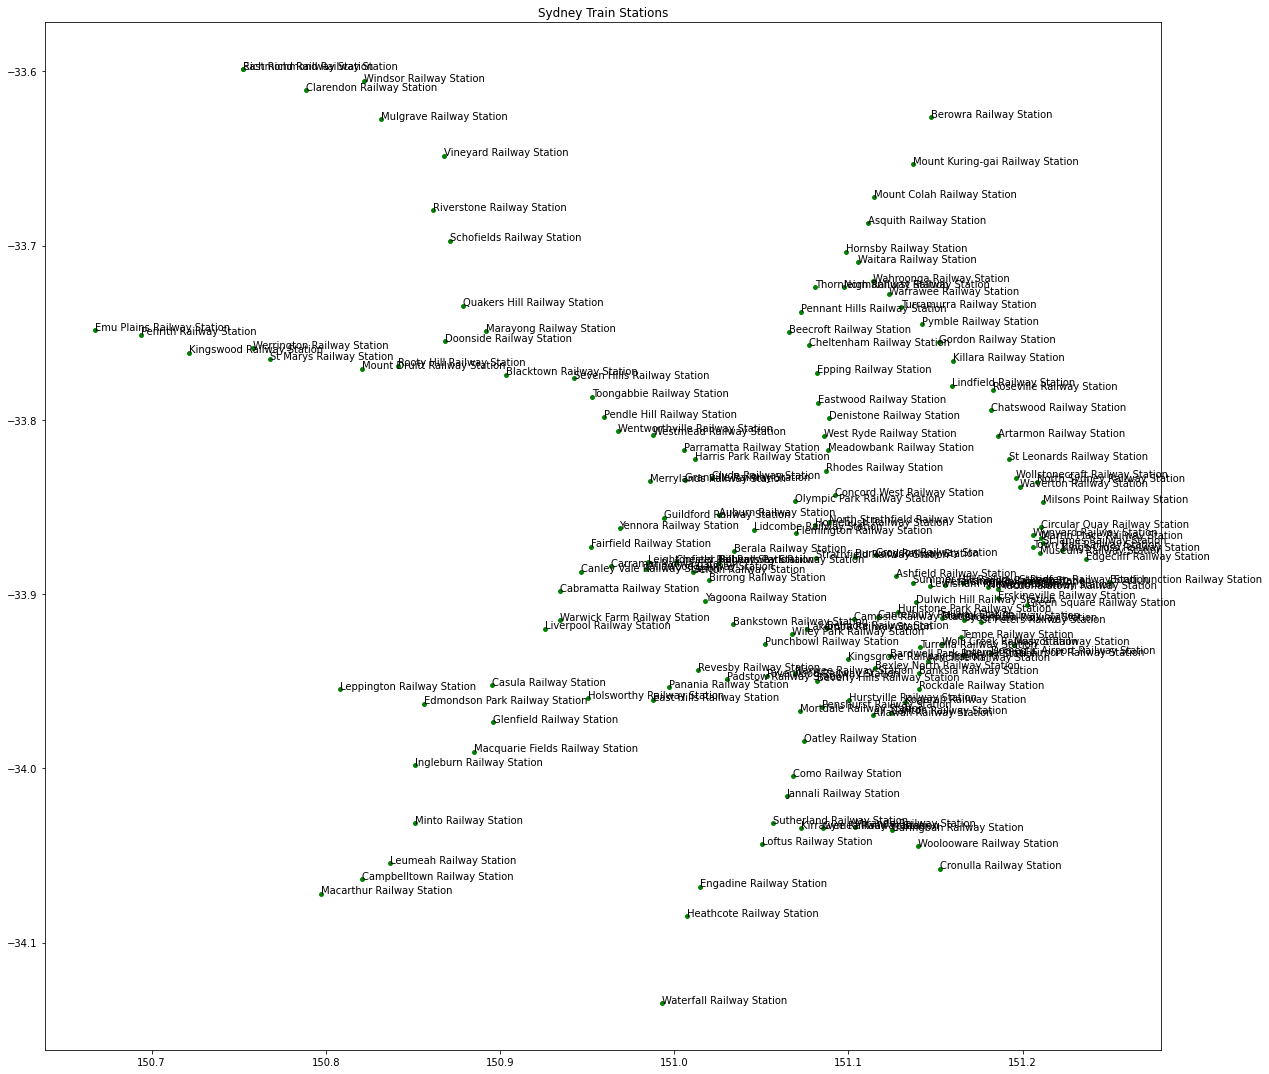

In [124]:
gdf.plot(marker='o', color='green', markersize=15);
plt.title("Sydney Train Stations");

for idx, row in stations.iterrows():
    plt.annotate(text=row['Station'], xy=(row['Longitude'], row['Latitude']))

In [125]:
# import house price data from xls
filepath2 = "house_prices.xls"
house_prices = pd.read_excel(filepath2, sheet_name='gmr_a')

In [126]:
house_prices.keys()

Index(['Table 8. Sale Prices — Greater Metropolitan Region — All Dwellings — December Quarter 2014',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [127]:
house_prices.sample(5)

,Table 8. Sale Prices — Greater Metropolitan Region — All Dwellings — December Quarter 2014,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
37,28.0,Blacktown,455,552.8,677,574.7,NaN,5.295238,NaN,17.617021,NaN
50,41.0,Warringah,650,955,1265,985.8,NaN,3.804348,NaN,11.695906,NaN
48,39.0,Pittwater,850,1101,1330,1163.1,NaN,3.186504,NaN,15.894737,NaN
49,40.0,Sutherland,657.5,820,989,856,NaN,9.333333,NaN,12.328767,NaN
11,4.0,Leichhardt,930,1200,1550,1395.7,NaN,4.575163,NaN,15.052733,NaN
